In [10]:
import numpy as np
from pandas.core.frame import DataFrame

# 读取文件

In [11]:
root =  "/media/q/data/lihongyi2020/hw2"
np.random.seed(0)
X_train_fpath = root + '/data/adult.data'
Y_train_fpath = root + '/data/Y_train'
X_test_fpath = root + '/data/X_test'
output_fpath = root + '/output_{}.csv'

### age	年龄	连续型	
### workclass	工作类型   离散型	
    Private(私人);  
    Self-emp-not-inc(自由职业非公司);   
    Self-emp-inc(自由职业公司);   
    Federal-gov(联邦政府);   
    Local-gov(地方政府);    
    State-gov(州政府);   
    Without-pay(无薪);  
    Never-worked(无工作经验)  
### final-weight	样本权重	连续型	
### education	受教育程度	离散型
    Bachelors(学士);  
    Some-college(大学未毕业);   
    11th(高二);   
    HS-grad(高中毕业);  
    Prof-school(职业学校);   
    Assoc-acdm(大学专科);   
    Assoc-voc(准职业学位);  
    9th(初三),7th-8th(初中1-2年级);   
    12th(高三);   
    Masters(硕士); 
    1st-4th(小学1-4年级);   
    10th(高一);   
    Doctorate(博士);   
    5th-6th(小学5-6年级);   
    Preschool(幼儿园)  
### education-num	受教育时长	连续型	
### marital-status	婚姻情况	离散型	
    Married-civ-spouse(已婚平民配偶); 
    Divorced(离婚); 
    Never-married(未婚); 
    Separated(分居); 
    Widowed(丧偶); 
    Married-spouse-absent(已婚配偶异地); 
    arried-AF-spouse(已婚军属)
### occupation	职业	离散型	
    Tech-support(技术支持);  
    Craft-repair(手工艺维修);  
    Other-service(其他职业);   
    Sales(销售);   
    Exec-managerial(执行主管);   
    Prof-specialty(专业技术);  
    Handlers-cleaners(劳工保洁);  
    Machine-op-inspct(机械操作);  
    Adm-clerical(管理文书);  
    Farming-fishing(农业捕捞);   
    Transport-moving(运输);  
    Priv-house-serv(家政服务);   
    Protective-serv(保安);   
    Armed-Forces(军人)  
### relationship	家庭角色	离散型	
    Wife(妻子);   
    Own-child(孩子);  
    Husband(丈夫);   
    Not-in-family(离家);   
    Other-relative(其他关系);   
    Unmarried(未婚)  
### race	种族	离散型	
    White(白人);   
    Asian-Pac-Islander(亚裔、太平洋岛裔);  
    Amer-Indian-Eskimo(美洲印第安裔、爱斯基摩裔);   
    Black(非裔);   
    Other(其他)  
### sex	性别	离散型	
    Female(女); Male(男)
### capital-gain	资本收益	连续型	
### capital-loss	资本支出	连续型	
### hours-per-week	周工作小时数	连续型	
### country	国籍	离散型
    United-States(美国); Cambodia(柬埔寨); England(英国); Puerto-Rico(波多黎各); Canada(加拿大);
    Germany(德国); Outlying-US(Guam-USVI-etc) (美国海外属地); India(印度); Japan(日本); Greece(希腊);
    South(南美); China(中国); Cuba(古巴); Iran(伊朗); Honduras(洪都拉斯); 
    Philippines(菲律宾); Italy(意大利); Poland(波兰); Jamaica(牙买加)，Vietnam(越南); 
    Mexico(墨西哥); Portugal(葡萄牙); Ireland(爱尔兰); France(法国); Dominican-Republic(多米尼加共和国);
    Laos(老挝); Ecuador(厄瓜多尔); Taiwan(台湾); Haiti(海地); Columbia(哥伦比亚);
    Hungary(匈牙利); Guatemala(危地马拉); Nicaragua(尼加拉瓜); Scotland(苏格兰); Thailand(泰国); 
    Yugoslavia(南斯拉夫); El-Salvador(萨尔瓦多); Trinadad&Tobago(特立尼达和多巴哥); Peru(秘鲁); 
    Hong(香港); Holand-Netherlands(荷兰)
### income-level	收入等级	离散型
    <=50K; >50K

In [15]:
feature = {0:"age", 1:"workclass", 2:"final-weight", 3:"education", 4:"education-num", 5:"marital-status",
           6:"occupation", 7:"relationship", 8:"race", 9:"sex",10:"capital-gain",
           11:"capital-loss",12:"hours-per-week", 13:"country", 14:"income-level"}

In [24]:
x_train = []
with open(X_train_fpath) as f:
    lines = f.readlines()
    for line in lines:
        data = line.strip().split(",")
        x_train.append(data)
X_train = DataFrame(x_train)
X_train.rename(columns = feature, inplace=True)

In [25]:
X_train.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,income-level
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 数据处理

In [52]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

In [53]:
# age

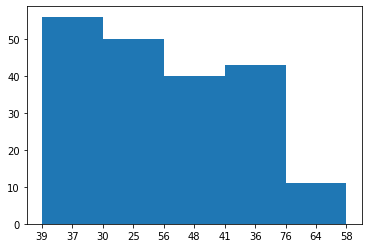

In [58]:
age = X_train["age"][:200]
age_n = np.array(age)
fig = plt.figure()

x_major_locator=MultipleLocator(5)
#把x轴的刻度间隔设置为1，并存在变量里
# y_major_locator=MultipleLocator(10)
# #把y轴的刻度间隔设置为10，并存在变量里
ax=plt.gca()
#ax为两条坐标轴的实例
ax.xaxis.set_major_locator(x_major_locator)

plt.hist(age, bins = 5)
plt.show()

In [27]:
age

0        39
1        50
2        38
3        53
4        28
         ..
32557    40
32558    58
32559    22
32560    52
32561      
Name: age, Length: 32562, dtype: object